#### Create a TSNE plot of the TSCA actives with a repeat dose toxicity overlaid

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
import sys
from scipy.spatial.distance import pdist, squareform


In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'


In [3]:
df = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_011222.xlsx')

In [5]:

df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,group,group_str,screenable_centroid,screenable_centroid_id,screenable_centroid_id2,screening_analogues,screening_dist,MaxMin_selection_picks,category_size,final_picks
0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125201,...,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID9061097,DTXSID4063036,0.045455,0.0,between20-70,NaN
1,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,82.078250,...,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,NaN,NaN,NaN,NaN,between20-70,NaN
2,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,120.093900,...,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,NaN,NaN,NaN,NaN,between20-70,NaN
3,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,208.219101,...,"('Acetylides', nan)","('Acetylides', nan)",centroid,DTXSID9061097,DTXSID9061097,DTXSID9061097,0.000000,1.0,between20-70,1.0
4,DTXSID1061233,"1,7-Octadiyne",871-84-1,DSOJWVLXZNRKCS-UHFFFAOYSA-N,"Octa-1,7-diyne",C#CCCCCC#C,"InChI=1S/C8H10/c1-3-5-7-8-6-4-2/h1-2H,5-8H2",C8H10,106.168,106.078250,...,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,NaN,NaN,NaN,NaN,between20-70,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14242,DTXSID7070391,"1,1'-((Phenylmethylene)bis((2-methyl-4,1-pheny...",66085-68-5,WMIMXCPQTYMGDN-UHFFFAOYSA-N,"1,1'-{(Phenylmethylene)bis[(2-methyl-4,1-pheny...",CC1=CC(=CC=C1N=NC1=C2C=CC=CC2=CC=C1O)C(C1=CC=C...,InChI=1S/C41H32N4O2/c1-26-24-31(16-20-35(26)42...,C41H32N4O2,612.733,612.252526,...,"('Triphenyl compounds', nan)","('Triphenyl compounds', nan)",NaN,NaN,DTXSID0060149,DTXSID7070391,0.878049,0.0,between20-70,NaN
14243,DTXSID70889405,"Oxirane, 2,2',2''-[methylidynetris(phenyleneox...",106253-69-4,WUULWDSQZQBRKW-UHFFFAOYSA-N,"3,3'-(2-Methyl-1,3-phenylene)bis(5-{[4-(bis{4-...",CC1=C(C=CC=C1N1CC(COC2=CC=C(C=C2)C(C2=CC=C(OCC...,InChI=1/C65H62N2O14/c1-41-60(66-29-54(80-64(66...,C65H62N2O14,1095.211,1094.420105,...,"('Triphenyl compounds', nan)","('Triphenyl compounds', nan)",NaN,NaN,DTXSID0060149,DTXSID70889405,0.920455,1.0,between20-70,1.0
14244,DTXSID90886794,"3H-Pyrazol-3-one, 4,4'-[(phenylmethylene)bis[(...",66085-69-6,WXNBMYJCPCEWND-UHFFFAOYSA-N,"4,4'-{(Phenylmethylene)bis[(2-methyl-4,1-pheny...",CC1=NN(C(=O)C1N=NC1=CC=C(C=C1C)C(C1=CC=CC=C1)C...,InChI=1/C41H36N8O2/c1-26-24-31(20-22-35(26)42-...,C41H36N8O2,672.793,672.296122,...,"('Triphenyl compounds', nan)","('Triphenyl compounds', nan)",NaN,NaN,DTXSID0060149,DTXSID90886794,0.910112,0.0,between20-70,NaN
14245,DTXSID3073052,"Phenol, 4,4'-[1-[4-[1-(4-hydroxyphenyl)-1-meth...",110726-28-8,WXYSZTISEJBRHW-UHFFFAOYSA-N,"4,4'-(1-{4-[2-(4-Hydroxyphenyl)propan-2-yl]phe...",CC(C)(C1=CC=C(O)C=C1)C1=CC=C(C=C1)C(C)(C1=CC=C...,"InChI=1S/C29H28O3/c1-28(2,21-8-14-25(30)15-9-2...",C29H28O3,424.540,424.203845,...,"('Triphenyl compounds', nan)","('Triphenyl compounds', nan)",NaN,NaN,DTXSID0060149,DTXSID3073052,0.849057,0.0,between20-70,NaN


In [7]:
import sqlalchemy as sa

In [8]:
username = 'grace'
removed = 'removed'
host = 'removed'

In [11]:
toxval_db = sa.create_engine(f"""mysql+pymysql://{username}:{removed}@{host}/toxval93""")

In [12]:
pd.read_sql("show tables",toxval_db)

,Tables_in_toxval93
0,toxval


In [13]:
pd.read_sql('''select count(*) from toxval''', toxval_db)

,count(*)
0,223354


In [24]:
pd.read_sql('''select toxval_units, count(*) from toxval group by toxval_units''', toxval_db)

,toxval_units,count(*)
0,mg/kg-day,143357
1,mg/m3,18739
2,mSv,3
3,mSv/yr,3
4,ng/m3,1
...,...,...
195,g/kg TAD,2
196,mg/ear,1
197,% CrO3,2
198,mg/kg/kg,1


In [14]:
oi_txval = pd.read_sql('''select * from toxval where toxval_type in ('NOAEL', 'LOAEL', 'NOEL', 'LEL') and common_name in ('Rat', 'Mouse', 'Rabbit') and exposure_route in ('oral', 'inhalation') ''', toxval_db)

In [15]:
oi_txval.shape

(98219, 45)

In [18]:
oi_txval = oi_txval[oi_txval['dtxsid'] != 'None']

In [19]:
oi_txval.shape

(98197, 45)

In [20]:
oi_txval.risk_assessment_class.value_counts(dropna = False)

subchronic                     21642
reproduction                   18823
chronic                        17354
developmental                  15808
reproduction developmental     10515
short-term                      7684
subacute                        2206
repeat dose                     1013
chronic cancer                   987
carcinogenicity                  758
immunotoxicity                   358
special toxicology study         276
neurotoxicity                    260
acute                            180
dose selection                   123
developmental neurotoxicity       95
genotoxicity                      64
uterotrophic                      37
Hershberger                       14
Name: risk_assessment_class, dtype: int64

In [181]:
txval_revised = pd.read_sql('''select * from toxval where toxval_type in ('NOAEL', 'LOAEL', 'NOEL', 'NEL' ,'LEL') and common_name in ('Rat', 'Mouse', 'Rabbit') and dtxsid != 'None' and study_type in ('subchronic',
 'developmental',
 'reproduction',
 'chronic',
 'reproduction developmental',
 'short-term',
 'repeat dose',
 'subacute',
 'chronic cancer',
 'carcinogenicity',
 'immunotoxicity',
 'special',
 'neurotoxicity',
 'dose selection',
 'developmental neurotoxicity') and exposure_route in ('oral', 'inhalation') and toxval_units in ("mg/kg-day", "mg/m3") ''', toxval_db)

In [182]:
txval_revised

,index,dtxsid,casrn,name,source,subsource,qc_status,toxval_type,toxval_subtype,toxval_type_supercategory,...,long_ref,title,author,journal,volume,ref_year,issue,url,source_hash,study_group
0,468,DTXSID4059916,375-22-4,Perfluorobutanoic acid,ATSDR PFAS,ATSDR Perfluoroalkyls Oral,pass,NOAEL,-,Point of Departure,...,3M 2007a,-,-,-,-,2007,-,https://www.atsdr.cdc.gov/toxprofiles/tp.asp?i...,f47fb6a25776d433001ad32e7f7edc42,ATSDR PFAS_2
1,469,DTXSID4059916,375-22-4,Perfluorobutanoic acid,ATSDR PFAS,ATSDR Perfluoroalkyls Oral,pass,NOAEL,-,Point of Departure,...,3M 2007a,-,-,-,-,2007,-,https://www.atsdr.cdc.gov/toxprofiles/tp.asp?i...,6b1d5f18f919dd3eb2e52390ff16b1f4,ATSDR PFAS_2
2,470,DTXSID4059916,375-22-4,Perfluorobutanoic acid,ATSDR PFAS,ATSDR Perfluoroalkyls Oral,pass,NOAEL,-,Point of Departure,...,3M 2007a,-,-,-,-,2007,-,https://www.atsdr.cdc.gov/toxprofiles/tp.asp?i...,d66cce9c32b1e7fcdb85c5f331884fa8,ATSDR PFAS_2
3,471,DTXSID4059916,375-22-4,Perfluorobutanoic acid,ATSDR PFAS,ATSDR Perfluoroalkyls Oral,pass,NOAEL,-,Point of Departure,...,3M 2007a,-,-,-,-,2007,-,https://www.atsdr.cdc.gov/toxprofiles/tp.asp?i...,90cd227919d3c738c12ff46b97f7927c,ATSDR PFAS_2
4,472,DTXSID4059916,375-22-4,Perfluorobutanoic acid,ATSDR PFAS,ATSDR Perfluoroalkyls Oral,pass,NOAEL,-,Point of Departure,...,3M 2007a,-,-,-,-,2007,-,https://www.atsdr.cdc.gov/toxprofiles/tp.asp?i...,159d5d5d2a8382217c95577e5e87bb7e,ATSDR PFAS_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112424,222098,DTXSID7047770,479-45-8,Trinitrophenylmethylnitramine,Wignall,PPRTV,pass,LOAEL,-,Point of Departure,...,"Reddy, T.V., F.B. Daniel, M. Robinson et al. 1...",-,-,-,-,1995,-,-,528646ce8d34e96a4292a14139a92a3e,Wignall_541
112425,222109,DTXSID3021431,108-05-4,Vinyl acetate,Wignall,HEAST,pass,NOAEL,-,Point of Departure,...,Shaw D.C. 1988. Vinyl acetate: 104-week oral (...,-,-,-,-,1988,-,-,4afb213d9e88fa4fd44b2928b63fe4bc,Wignall_552
112426,222110,DTXSID3021431,108-05-4,Vinyl acetate,Wignall,HEAST,pass,NOAEL,-,Point of Departure,...,Shaw D.C. 1988. Vinyl acetate: 104-week oral (...,-,-,-,-,1988,-,-,fd2118718abcdd0cf57ca4ab2cb26664,Wignall_552
112427,222111,DTXSID3021431,108-05-4,Vinyl acetate,Wignall,HEAST,pass,NOAEL,-,Point of Departure,...,Shaw D.C. 1988. Vinyl acetate: 104-week oral (...,-,-,-,-,1988,-,-,533d79a395c865de7a835cdd1622790a,Wignall_552


In [183]:
txval_min = txval_revised.groupby(['dtxsid', 'study_group', 'study_type', 'toxval_type']).agg({'toxval_numeric' : 'min'}).reset_index()

In [184]:
txval_min.columns = ['dtxsid', 'study_group', 'study_type', 'toxval_type', 'min_toxval_numeric']

In [185]:
txval_min = txval_min.groupby('dtxsid').agg({'study_group' : 'count'}).reset_index()

<AxesSubplot:>

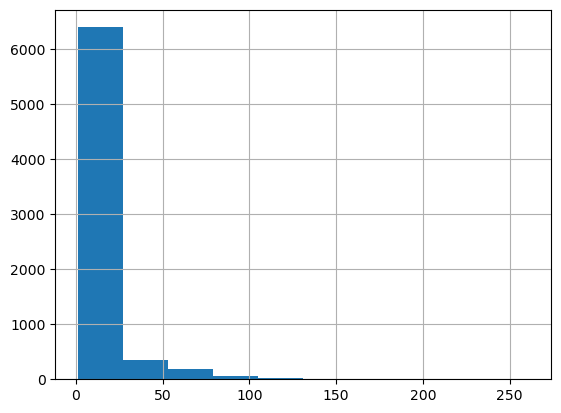

In [186]:
txval_min.study_group.hist()

In [37]:
df1 = pd.merge(df, txval_min, on = 'dtxsid', how = 'left')

In [40]:
df1['RD_Avail'] = df1['study_group'].apply(lambda x : 1 if x >=1 else 0)

In [43]:
df1['RD_Avail'].value_counts(normalize = True)

0    0.786903
1    0.213097
Name: RD_Avail, dtype: float64

In [147]:
df1['study_group'] = df1.study_group.replace(0, np.nan)

In [148]:
df1['study_group'].value_counts().sort_values( ascending = False)

2.0      521
1.0      496
4.0      344
3.0      334
5.0      199
        ... 
99.0       1
92.0       1
105.0      1
114.0      1
85.0       1
Name: study_group, Length: 87, dtype: int64

In [149]:
df1['Study_density'] = pd.cut(x = df1['study_group'], bins = [0,5,20,50,200], labels = ['lte5', 'lte20', 'lte50', 'lte200'])

In [151]:
df1['Study_density'].value_counts(dropna= False)

NaN       11212
lte5       1894
lte20       865
lte50       208
lte200       68
Name: Study_density, dtype: int64

In [153]:
df1['Study_density'] = df1['Study_density'].cat.add_categories('no data').fillna('no data')

In [155]:
#df1

In [142]:
199+334+344+496

1373

In [45]:
import umap

In [46]:
reducer = umap.UMAP()

In [47]:
MOLS = dict(zip(df1['dtxsid'], df1['smiles']))
MOLS = {k:Chem.MolFromSmiles(v) for k,v in MOLS.items()}
MOLS = {i:j for i,j in MOLS.items() if j}
FP0 = pd.DataFrame([np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,1024)) for i in MOLS.values()])
FP0.index = MOLS.keys()
FP0.columns = ['mrgn_%d'%i for i in FP0.columns]

RDKit ERROR: [22:16:35] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [22:16:35] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [22:16:35] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [22:16:35] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [22:16:35] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [22:16:35] Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [22:16:35] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [22:16:35] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [22:16:35] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [22:16:35] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [22:16:35] Explicit valence for atom # 0 O, 4, is greater than permitted
RDKit ERROR: [22:16:35] SMILES Parse Error: syntax er

In [49]:
FP0

,mrgn_0,mrgn_1,mrgn_2,mrgn_3,mrgn_4,mrgn_5,mrgn_6,mrgn_7,mrgn_8,mrgn_9,...,mrgn_1014,mrgn_1015,mrgn_1016,mrgn_1017,mrgn_1018,mrgn_1019,mrgn_1020,mrgn_1021,mrgn_1022,mrgn_1023
DTXSID4063036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID30870753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
DTXSID7062374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID9061097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID1061233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID7070391,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID70889405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
DTXSID90886794,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
DTXSID3073052,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
umap_features = reducer.fit_transform(FP0.values)

In [51]:
umap_features.shape

(14194, 2)

In [54]:
umap_df = pd.DataFrame(umap_features, index = FP0.index, columns = ['umap_x', 'umap_y'])

In [57]:
umap_df = umap_df.reset_index()

In [59]:
umap_df.columns = ['dtxsid', 'umap_x', 'umap_y']

In [156]:
umap_df = pd.merge(umap_df, df1[['dtxsid','RD_Avail', 'Study_density', 'study_group']] , on = 'dtxsid', how = 'left')

In [158]:
umap_df.rename(columns = {'RD_Avail_x' : 'RD_Avail'}, inplace = True)
umap_df.drop(['RD_Avail_y'], axis =1, inplace = True)
umap_df.head()

,dtxsid,umap_x,umap_y,RD_Avail,Study_density,study_group
0,DTXSID4063036,13.270264,9.425129,0,no data,NaN
1,DTXSID30870753,13.303192,9.141326,0,no data,NaN
2,DTXSID7062374,13.316829,9.146596,0,no data,NaN
3,DTXSID9061097,13.284515,9.414210,0,no data,NaN
4,DTXSID1061233,13.304126,9.123169,0,no data,NaN


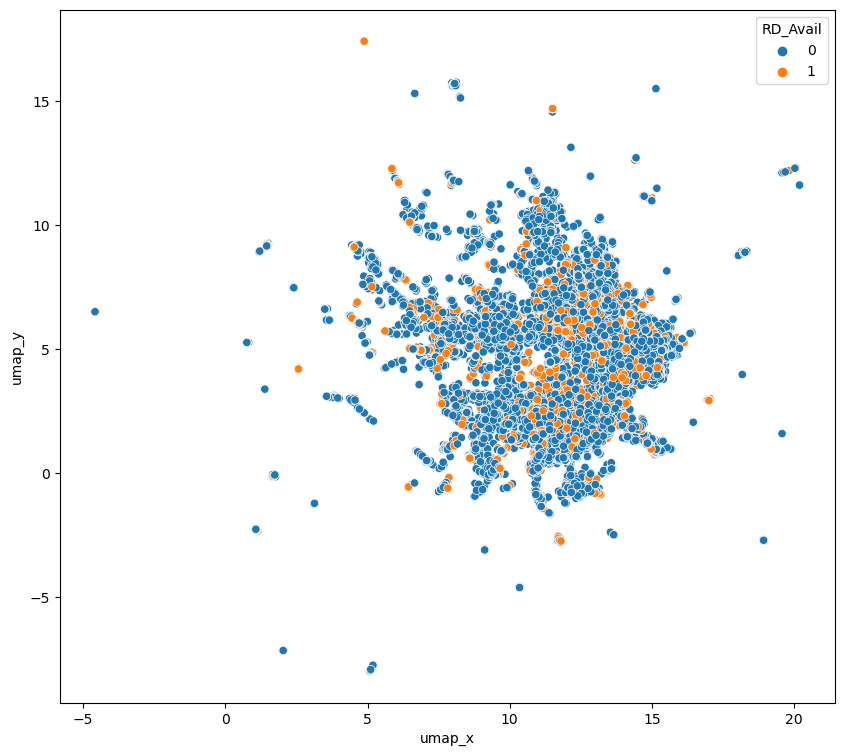

In [66]:
fig, ax = plt.subplots(figsize = (10,9))

#colors = {1:'red', 0 : 'blue'}

#grouped = tsne_df.groupby('Source')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', alpha = alphas[0], label=key, color=colors[key])
ax = sns.scatterplot(x="umap_x", y="umap_y",
                     data=umap_df, hue = "RD_Avail")

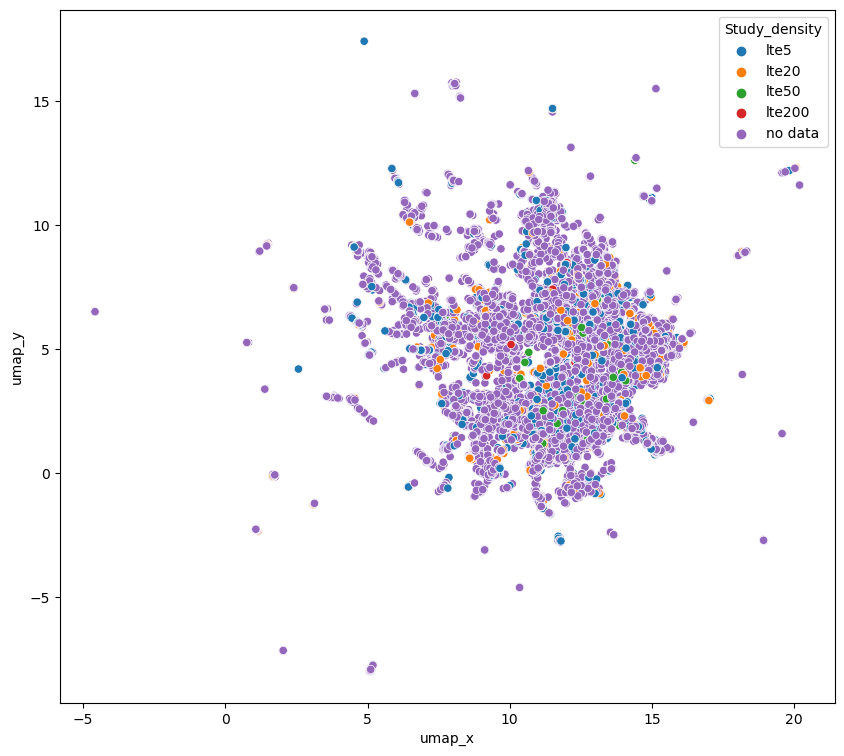

In [159]:
fig, ax = plt.subplots(figsize = (10,9))

#colors = {1:'red', 0 : 'blue'}

#grouped = tsne_df.groupby('Source')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', alpha = alphas[0], label=key, color=colors[key])
ax = sns.scatterplot(x="umap_x", y="umap_y",
                     data=umap_df, hue = "Study_density")

In [67]:
from sklearn.feature_selection import VarianceThreshold

In [74]:
var_thr = VarianceThreshold(threshold = 0.01) #Removing both constant and quasi-constant
var_thr.fit(FP0)

var_thr.get_support()

array([ True,  True,  True, ..., False,  True,  True])

In [75]:
concol = [column for column in FP0.columns if column not in FP0.columns[var_thr.get_support()]]


In [77]:
len(concol)

185

In [78]:
X = FP0.drop(concol,axis=1)

In [79]:
X.shape

(14194, 839)

In [81]:
X1 = X.reset_index()

In [83]:
X1.rename(columns = {'index' : 'dtxsid'}, inplace = True)

In [160]:
X1 = pd.merge(X1, df1[['dtxsid','RD_Avail', 'Study_density', 'study_group']] , on = 'dtxsid', how = 'left')

In [162]:
X1.rename(columns = {'RD_Avail_x' : 'RD_Avail'}, inplace = True)
X1.drop(['RD_Avail_y'], axis =1, inplace = True)
X1.head()

,dtxsid,mrgn_0,mrgn_1,mrgn_2,mrgn_3,mrgn_4,mrgn_5,mrgn_7,mrgn_8,mrgn_9,...,mrgn_1016,mrgn_1017,mrgn_1018,mrgn_1019,mrgn_1020,mrgn_1022,mrgn_1023,RD_Avail,Study_density,study_group
0,DTXSID4063036,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,no data,NaN
1,DTXSID30870753,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,no data,NaN
2,DTXSID7062374,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,no data,NaN
3,DTXSID9061097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,no data,NaN
4,DTXSID1061233,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,no data,NaN


In [86]:
from sklearn.manifold import TSNE

In [87]:
model = TSNE(learning_rate = 200)

In [163]:
X1 = X1.set_index('dtxsid')

In [165]:
X1.iloc[:,:-3]

,mrgn_0,mrgn_1,mrgn_2,mrgn_3,mrgn_4,mrgn_5,mrgn_7,mrgn_8,mrgn_9,mrgn_10,...,mrgn_1011,mrgn_1013,mrgn_1014,mrgn_1016,mrgn_1017,mrgn_1018,mrgn_1019,mrgn_1020,mrgn_1022,mrgn_1023
dtxsid,,,,,,,,,,,,,,,,,,,,,
DTXSID4063036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID30870753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
DTXSID7062374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID9061097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID1061233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID7070391,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID70889405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
DTXSID90886794,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [166]:
tsne_features = model.fit_transform(X1.iloc[:,:-3])

In [168]:
#X1.iloc[:,-3:]

In [169]:
tsne_df=pd.concat([pd.DataFrame(tsne_features, index = X1.index, columns = ['tsne_x', 'tsne_y']), X1.iloc[:,-3:]],axis =1)

In [170]:
tsne_df['RD_Avail'].value_counts(normalize = True)

0    0.78667
1    0.21333
Name: RD_Avail, dtype: float64

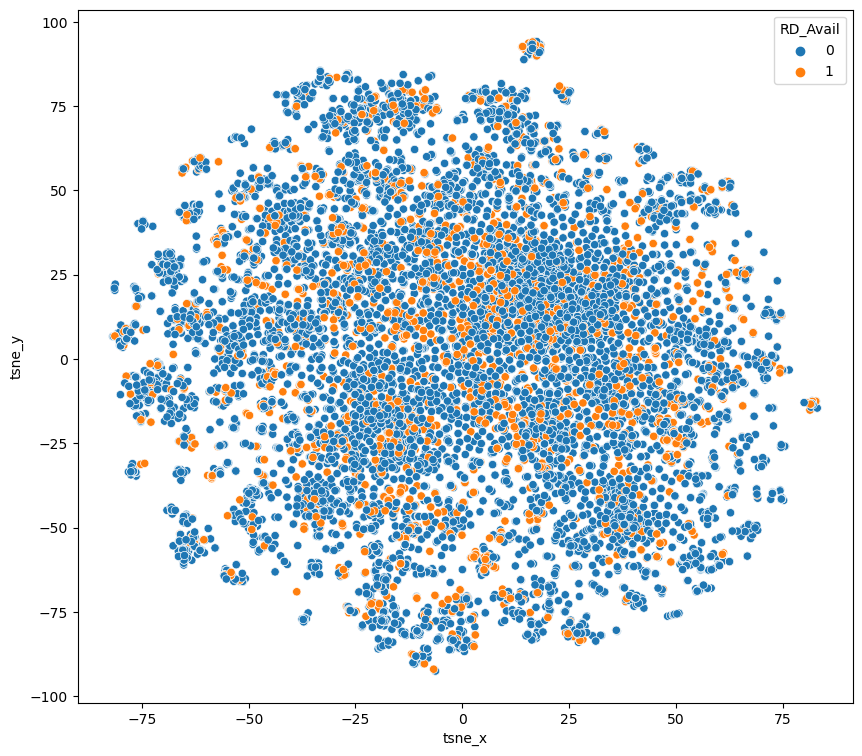

In [178]:
fig, ax = plt.subplots(figsize = (10,9))

#colors = {1:'red', 0 : 'blue'}

#grouped = tsne_df.groupby('Source')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', alpha = alphas[0], label=key, color=colors[key])
ax = sns.scatterplot(x="tsne_x", y="tsne_y",
                     data=tsne_df, hue = 'RD_Avail')
plt.savefig(figures_dir+'Mgrn_TSNE_RDAvail.png', dpi = 300)

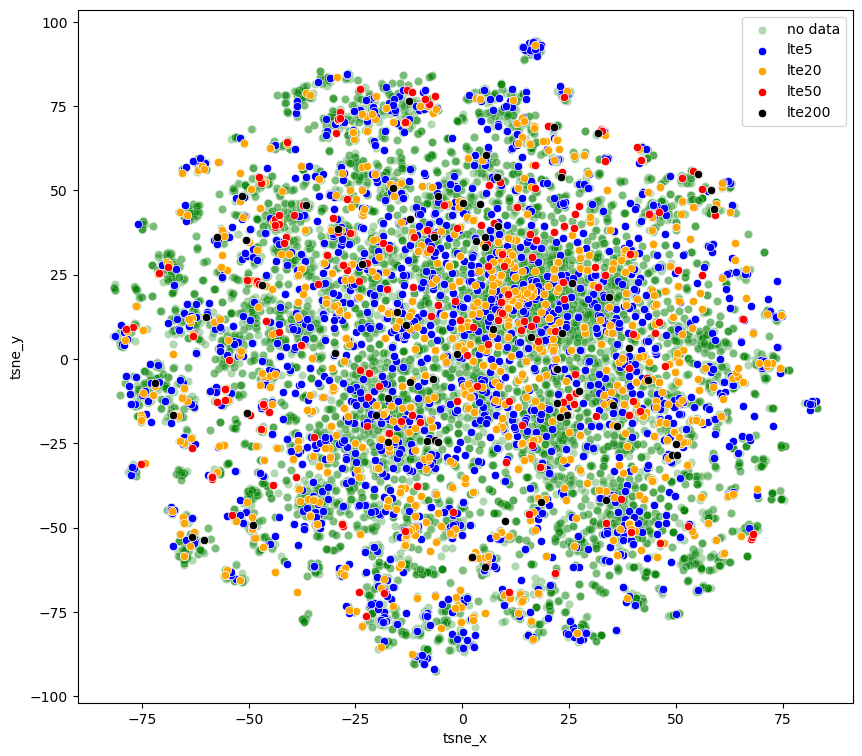

In [179]:
fig, ax = plt.subplots(figsize = (10,9))

colors = {'no_data':'green','lte5':'blue', 'lte20': 'orange', 'lte50' : 'red', 'lte200':'black'}
tsne_df['alpha'] = np.where(tsne_df.Study_density == 'no_data', 0.3,1)
alphas = tsne_df.alpha.sort_values().unique()
#grouped = tsne_df.groupby('Source')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', alpha = alphas[0], label=key, color=colors[key])
ax = sns.scatterplot(x="tsne_x", y="tsne_y",
                     data=tsne_df[tsne_df.Study_density == 'no data'], alpha=0.3, label = 'no data', color = colors['no_data'])
ax = sns.scatterplot(x="tsne_x", y="tsne_y",
                    data=tsne_df[tsne_df.Study_density == 'lte5'], alpha=1, label = 'lte5', color = colors['lte5'])
ax = sns.scatterplot(x="tsne_x", y="tsne_y",
                     data=tsne_df[tsne_df.Study_density == 'lte20'], alpha=1, label = 'lte20', color = colors['lte20'])
ax = sns.scatterplot(x="tsne_x", y="tsne_y",
                     data=tsne_df[tsne_df.Study_density == 'lte50'], alpha=1, label = 'lte50', color = colors['lte50']) 
ax = sns.scatterplot(x="tsne_x", y="tsne_y",
                     data=tsne_df[tsne_df.Study_density == 'lte200'], alpha=1, label = 'lte200', color = colors['lte200'])  
plt.savefig(figures_dir+'Mgrn_TSNE_Density.png', dpi = 300)

In [175]:
#tsne_df

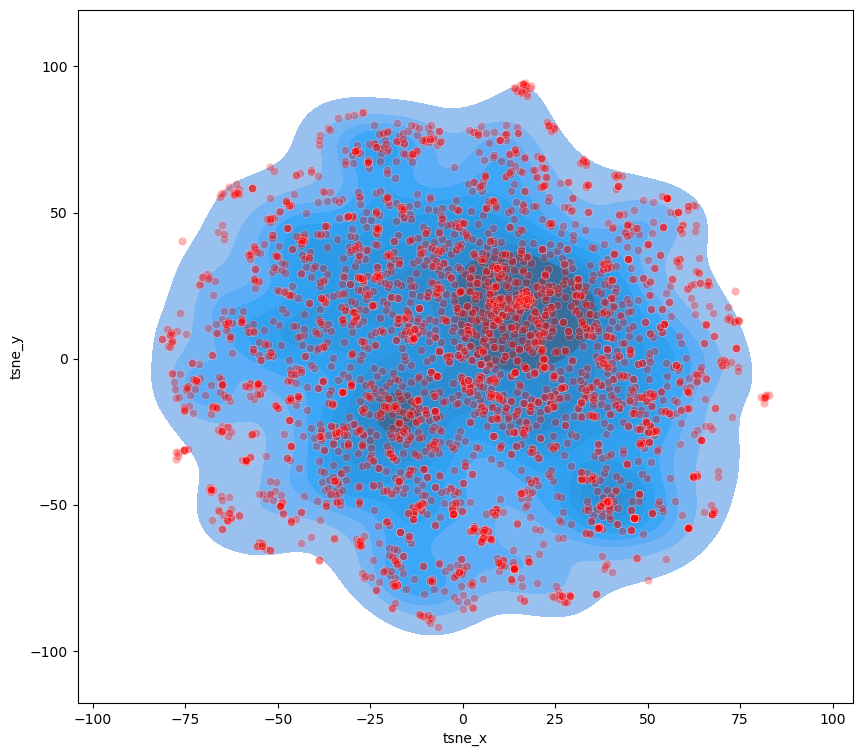

In [180]:
fig, ax = plt.subplots(figsize = (10,9))

#colors = {1:'red', 0 : 'blue'}

#grouped = tsne_df.groupby('Source')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', alpha = alphas[0], label=key, color=colors[key])
ax = sns.kdeplot(x="tsne_x", y="tsne_y", fill = True,
                     data=tsne_df)
ax = sns.scatterplot(x="tsne_x", y="tsne_y",
                     data=tsne_df[tsne_df['RD_Avail'] ==1], alpha = 0.3, color = 'red')
plt.savefig(figures_dir+'Mgrn_TSNE_Avail_KDE.png', dpi = 300)